This data set uses the NYCFlights13 dataset. We perform exploratory analysis, followed by answering some of the most interesting questions, identifying insights about flight data, visualizing the patterns & formulating & analysing research questions by comparing flight data with weather data.

In [1]:
import IPython
print ("IPython version: "+IPython.__version__+" (need at least 1.0)")
# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version: "+np.__version__+" (need at least 1.7.1)" )
# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:"+sp.__version__+" (need at least 0.12.0)")
# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:"+pd.__version__+" (need at least 0.11.0)")
# Module for plotting
import matplotlib
print ("Mapltolib version:"+matplotlib.__version__+" (need at least 1.2.1)")
# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version:"+ sklearn.__version__+" (need at least 0.13.1)")

IPython version: 7.29.0 (need at least 1.0)
Numpy version: 1.20.3 (need at least 1.7.1)
SciPy version:1.7.1 (need at least 0.12.0)
Pandas version:1.3.4 (need at least 0.11.0)
Mapltolib version:3.4.3 (need at least 1.2.1)
Scikit-Learn version:0.24.2 (need at least 0.13.1)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
flights_df.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [6]:

flights_df.head(5)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [7]:
# Your code here
dest_seattle = flights_df['dest']=='SEA'
len(flights_df[dest_seattle])

3923

There were 3923 flights from NYC to Seattle in 2013

(b) How many airlines fly from NYC to Seattle?

In [8]:
flights_seattle_df = flights_df[dest_seattle]
len(flights_seattle_df['carrier'].unique())

5

There are 5 airlines that fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [9]:
flights_seattle_df['tailnum'].nunique()

935

There are 935 uniqre air planes from NYC to Seattle

(d) What is the average arrival delay for flights from NC to Seattle?

In [10]:
flights_seattle_df['arr_delay'].mean()

-1.0990990990990992

-1.0990990990990992 is the average arrival delay for flights from NYC to Seattle i.e on an average, the flights arrive about a minute early.

What proportion of flights to Seattle come from each NYC airport?

In [11]:
print(flights_seattle_df.groupby('origin').size()/flights_seattle_df['flight'].count())

origin
EWR    0.466735
JFK    0.533265
dtype: float64


The proportion of flights from EWR and JFK is 0.47 and 0.53 i.e 47% and 53% respectively.

Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [12]:
flights_grp_dd_df = flights_df.groupby(['month','day'],as_index = False).agg({'dep_delay':'mean'})
max_dep_delay = flights_grp_dd_df['dep_delay'].max()
print(flights_grp_dd_df[flights_grp_dd_df['dep_delay']== max_dep_delay])

flights_grp_ad_df = flights_df.groupby(['month','day'],as_index = False).agg({'arr_delay':'mean'})
max_arr_delay = flights_grp_ad_df['arr_delay'].max()
print(flights_grp_ad_df[flights_grp_ad_df['arr_delay']== max_arr_delay])

    month  day  dep_delay
66      3    8  83.536921
    month  day  arr_delay
66      3    8  85.862155


The largest average departure(83.5369 min) and arrival delay(85.8622) was on 8th of March 2013

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [13]:
#Worst day is the day with maximum number of delayed flights(flights with positive departure delay)

flights_grp_dd_df = flights_df[flights_df['dep_delay']>0].groupby(['month','day'],as_index = False).agg({'flight':'count'})
#print(flights_grp_dd_df)

max_delayed_flights = flights_grp_dd_df['flight'].max()
print(flights_grp_dd_df[flights_grp_dd_df['flight']  == max_delayed_flights])

     month  day  flight
356     12   23     674


Worst day to fly out of NYC in 2013 was 23rd of December with 674 flights having a delayed departure from NYC.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

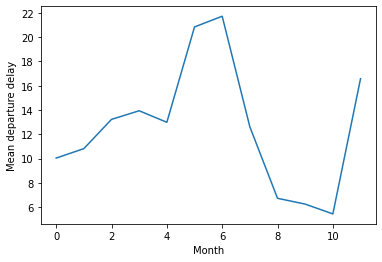

In [14]:
delay_mon_grp = flights_df.groupby(['month'],as_index = False).agg({'dep_delay':'mean'})
delay_mon_grp['dep_delay'].plot()
plt.xlabel('Month')
plt.ylabel('Mean departure delay')
plt.show()


The departure delays shoot up during summer season (May,June) and go up again during the holiday season (Nov,Dec). The delays are compartively very during the months of August to October.

(d) On average, how do departure delays vary over the course of a day?

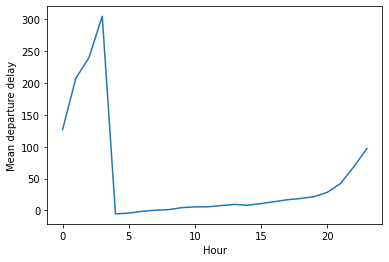

In [15]:
#flights_df = pd.read_csv('flights.csv')
flights_df.loc[flights_df.hour == 24 ,'hour'] = 0
delay_grp = flights_df.groupby(['hour'],as_index = False).agg({'dep_delay':'mean'})
delay_grp['dep_delay'].plot()
plt.xlabel('Hour')
plt.ylabel('Mean departure delay')
plt.show()

#flights_df['dep_delay'].hist(by=flights_df['hour'])

On an average, the departure delays are at a peak during about 3 am in the morning and again 23 pm at night, there is a small peak.

Which flight departing NYC in 2013 flew the fastest?

In [16]:
# Fastest flight = Flight details with the max speed
# Speed = distance/time = distance in miles/airtime in hr = distance in miles/(airtime in min/60)
flights_df['speed'] = flights_df.distance/(flights_df.air_time/60)
max_speed = max(flights_df['speed'])
flights_df[flights_df['speed']== max_speed]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,703.384615


The fastest flight (Flight no - 1499, Tailnum - N666DN) flew from LGA to ATL on 25th of May at 5 pm with a speed of 703.38 miles/hr.

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [17]:
#To find the carrier+flight+dest combination which flies every day of the year. Also find the destination of the flight.
flights_df['unique_day'] = pd.factorize(flights_df.month+flights_df.day)[0]
flights_count_df = flights_df.groupby(['flight','carrier','dest'],as_index = False).agg({'unique_day':'count'})
print(len(flights_count_df[flights_count_df['unique_day']>=365]))
print(flights_count_df[flights_count_df['unique_day']>=365].dest.unique())

18
['HNL' 'SFO' 'LAX' 'CLT' 'LAS' 'BUR' 'FLL' 'SRQ' 'SJU' 'MIA' 'MCO' 'TPA'
 'IAD']


There are 18 flights which fly every day. They fly to 'HNL' 'SFO' 'LAX' 'CLT' 'LAS' 'BUR' 'FLL' 'SRQ' 'SJU' 'MIA' 'MCO' 'TPA'
 'IAD'

Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


  carrier  dep_delay
0      AA  10.041551
1      AS   5.804775
2      B6  11.592593
3      DL   7.391376
4      UA  17.315647


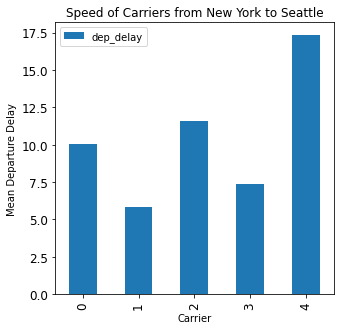

  carrier  arr_delay
0      AA  -1.475000
1      AS  -9.930889
2      B6   7.721248
3      DL  -5.886023
4      UA   5.827430


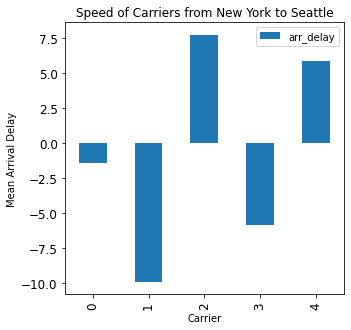

In [18]:
flights_speed_dep_df = flights_seattle_df.groupby(['carrier'],as_index = False).agg({'dep_delay':'mean'})
print(flights_speed_dep_df)
flights_speed_dep_df.plot(kind='bar', title ="Speed of Carriers from New York to Seattle",figsize=(5,5),legend=True, fontsize=12)
plt.xlabel('Carrier')
plt.ylabel('Mean Departure Delay')
plt.show()
plt.close()

flights_speed_arr_df = flights_seattle_df.groupby(['carrier'],as_index = False).agg({'arr_delay':'mean'})
print(flights_speed_arr_df)
flights_speed_arr_df.plot(kind='bar', title ="Speed of Carriers from New York to Seattle",figsize=(5,5),legend=True, fontsize=12)
plt.xlabel('Carrier')
plt.ylabel('Mean Arrival Delay')
plt.show()
plt.close()

The research question is 
"Among the flights that fly to Seattle, on an average how does the departure & arrival delay look like for every carrier? Do you see a specific carrier which has a very high average?"

From the bar graph, we see that United Airlines has the highest average departure delay to Seattle. Also, Alaska Airlines has the least average departure delay of all.

From the bar graph, we see that JetBlue has the highest average arrival delay to Seattle while Alaska Airlines has a negative average, implying that on an average, Alaskan Airlines arrive earlier than expected.

Thus from this analysis, we can say that Alaskan Airlines fares the best in terms of average delays to Seattle, if you dislike delayed flights.

What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

Index(['month', 'day', 'dep_delay', 'temp', 'humid', 'visib', 'dewp',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure'],
      dtype='object')


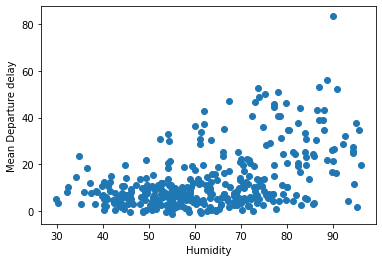

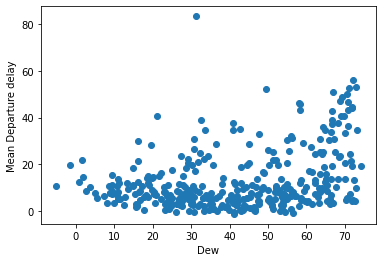

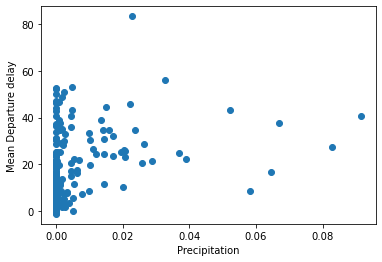

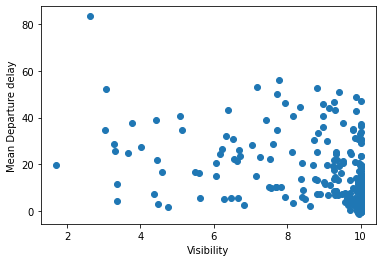

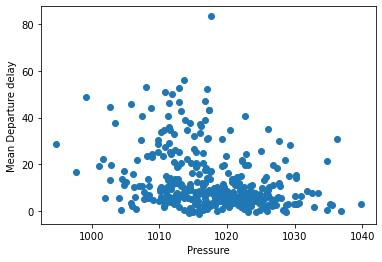

In [19]:
weather_df = pd.read_csv('weather.csv')
weather_df
combined_df = pd.merge(flights_df,weather_df, how = 'left', on = ['origin','year','month','day','hour'])
#print(combined_df.head())
combined_df = combined_df[['month','day','dep_delay','temp','humid','visib','dewp','wind_dir','wind_speed','wind_gust','precip','pressure']]
wea_temp_day_df = combined_df.groupby(['month','day'],as_index = False).agg({'dep_delay':'mean','temp':'mean','humid':'mean','visib':'mean','dewp':'mean','wind_dir':'mean','wind_speed':'mean','wind_gust':'mean','precip':'mean','pressure':'mean'})
print(wea_temp_day_df.columns)

plt.scatter(wea_temp_day_df['humid'], wea_temp_day_df['dep_delay'])
plt.xlabel('Humidity')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(wea_temp_day_df['dewp'], wea_temp_day_df['dep_delay'])
plt.xlabel('Dew')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(wea_temp_day_df['precip'], wea_temp_day_df['dep_delay'])
plt.xlabel('Precipitation')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()


plt.scatter(wea_temp_day_df['visib'], wea_temp_day_df['dep_delay'])
plt.xlabel('Visibility')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(wea_temp_day_df['pressure'], wea_temp_day_df['dep_delay'])
plt.xlabel('Pressure')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()




There seems to be a positive correlation between humidity(0.478), dew(0.324), precipitation(0.374) and departure delay i.e. higher the humidity, dew, precipitation levels, greater is the departure delay. 
Also, there is a negative correlation between visibility(-0.432) and pressure(-0.286) i.e. higher the visibility/pressure, lower is the departure delay. However, none of the weather attributes show very strong correlation with departure delay